# SPARQL queries & tests

## Database password
Please fill in the database password below

In [1]:
from __future__ import print_function
import ipywidgets as widgets
passwordField = widgets.Password(value="postgres")
passwordField

Password()

In [2]:
from sqlalchemy import create_engine

connectionString = "postgresql://postgres:%s@postgresdb:5432/thunder" % passwordField.value
dbEngine = create_engine(connectionString)

In [3]:
from r2rmlQueryEditor import R2RMLQueryEditor

r2rmlEditor = R2RMLQueryEditor("http://sparql_open:7200/repositories/r2rml", dbEngine)
widgets.VBox(r2rmlEditor.runInterface())

VkJveChjaGlsZHJlbj0oSEJveChjaGlsZHJlbj0oVGV4dGFyZWEodmFsdWU9dSdTRUxFQ1QgaWQsIGdlbmRlciwgY3QgYXMgY2xpbmljYWxfdCwgY24gYXMgY2xpbmljYWxfbiBGUk9NIHRodW7igKY=


Update executed. Please load this page again to make sure changes have applied to the database


In [4]:
comparisonEngine.load('gender', sqlDateColumns=[], sparqlDateColumns=[])

NameError: name 'comparisonEngine' is not defined

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUneFNRTCcsIG9wdGlvbnM9KHUnaWQnLCB1J2dlbmRlcicsIHUnY2xpbmljYWxfdCcsIHUnY2xpbmljYWxfbicpLCDigKY=


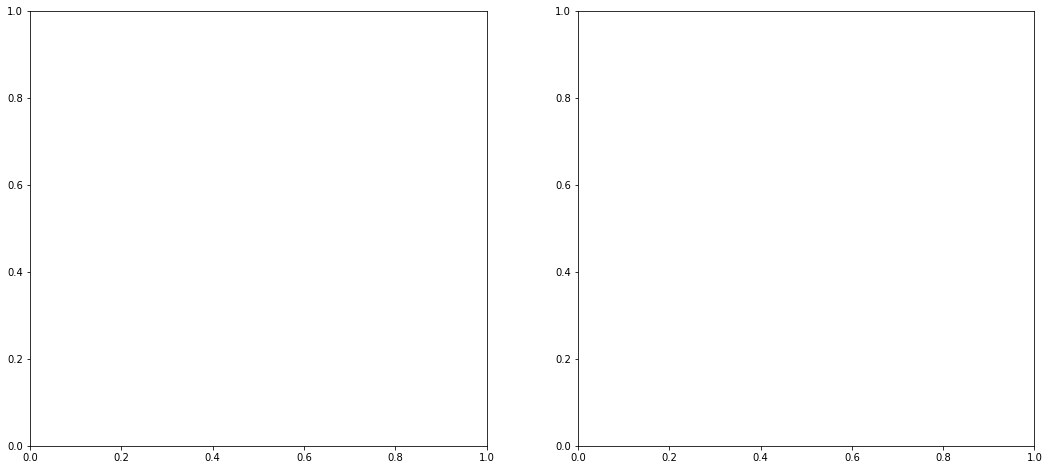

In [7]:
comparisonEngine.interact(figsize=(18, 8))